In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from skimage.feature import hog


In [5]:
data = pd.read_csv("C:/Users/ASUS/ATS/UTS VISION/emnist-letters-train.csv", header=None)

balanced_data = pd.DataFrame()
for label in range(1, 27):
    subset = data[data[0] == label].sample(n=100, random_state=42)
    balanced_data = pd.concat([balanced_data, subset], axis=0)

balanced_data = shuffle(balanced_data, random_state=42).reset_index(drop=True)


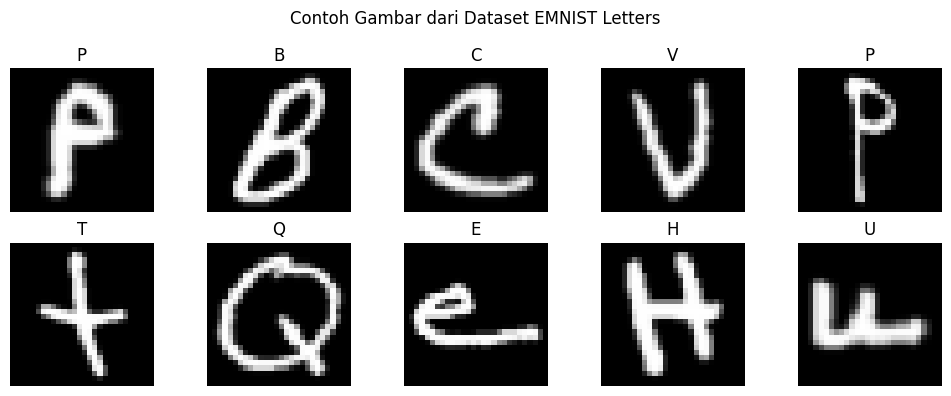

In [6]:
plt.figure(figsize=(10, 4))
for i in range(10):
    label = chr(int(balanced_data.iloc[i, 0]) + 64)
    img = balanced_data.iloc[i, 1:].values.reshape(28, 28).T
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.suptitle("Contoh Gambar dari Dataset EMNIST Letters")
plt.tight_layout()
plt.show()


In [7]:
X = balanced_data.iloc[:, 1:].values
y = balanced_data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [8]:
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys'
}

def extract_hog_features(images):
    features = []
    for img in images:
        reshaped = img.reshape(28, 28).T
        hog_feat = hog(reshaped, **hog_params)
        features.append(hog_feat)
    return np.array(features)


In [9]:
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)


In [10]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_hog, y_train)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [11]:
best_model = grid.best_estimator_
print("\n===== HASIL GRID SEARCH SVM =====")
print("Parameter terbaik:", grid.best_params_)
print("Skor cross-validation terbaik:", grid.best_score_)



===== HASIL GRID SEARCH SVM =====
Parameter terbaik: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Skor cross-validation terbaik: 0.7980823744512505


In [13]:
y_train_pred = best_model.predict(X_train_hog)
print("\n===== EVALUASI TRAINING SET (80%) =====")
print(classification_report(y_train, y_train_pred))




===== EVALUASI TRAINING SET (80%) =====
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        80
           8       1.00      1.00      1.00        80
           9       0.99      0.96      0.97        80
          10       1.00      1.00      1.00        80
          11       1.00      1.00      1.00        80
          12       0.96      0.99      0.98        80
          13       1.00      1.00      1.00        80
          14       1.00      1.00      1.00        80
          15       1.00      1.00      1.00        80
          16       1.00      1.00      1.00        80
          17       1.00      1.00      1

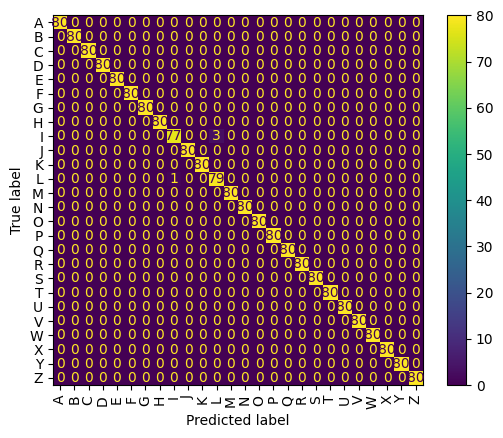

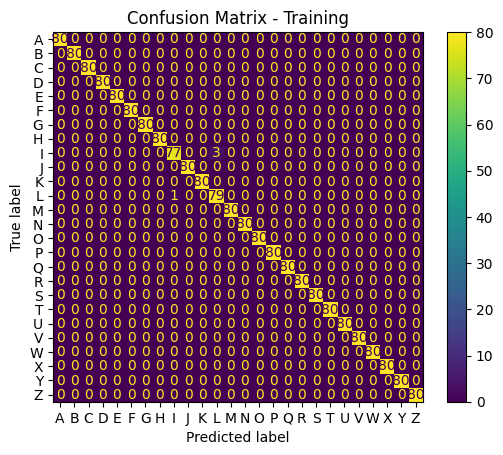

In [14]:
ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred,
    display_labels=[chr(i + 64) for i in range(1, 27)],
    xticks_rotation='vertical'
).plot()
plt.title("Confusion Matrix - Training")
plt.show()

In [15]:
y_test_pred = best_model.predict(X_test_hog)
print("\n===== EVALUASI TESTING SET (20%) =====")
print(classification_report(y_test, y_test_pred))





===== EVALUASI TESTING SET (20%) =====
              precision    recall  f1-score   support

           1       0.48      0.55      0.51        20
           2       0.73      0.55      0.63        20
           3       0.76      0.65      0.70        20
           4       0.84      0.80      0.82        20
           5       0.64      0.80      0.71        20
           6       0.94      0.80      0.86        20
           7       0.55      0.55      0.55        20
           8       0.68      0.75      0.71        20
           9       0.50      0.65      0.57        20
          10       0.76      0.65      0.70        20
          11       0.95      0.95      0.95        20
          12       0.69      0.55      0.61        20
          13       0.81      0.65      0.72        20
          14       0.68      0.85      0.76        20
          15       0.83      1.00      0.91        20
          16       0.80      0.80      0.80        20
          17       0.50      0.50      0.

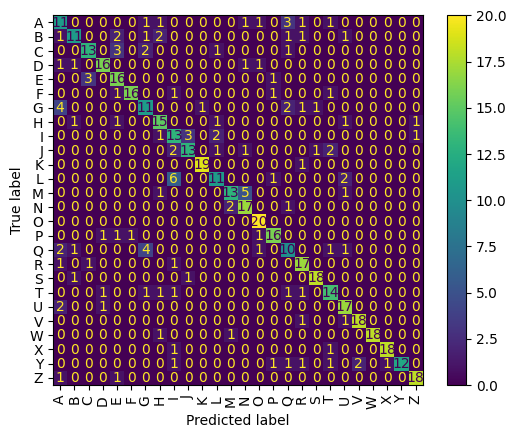

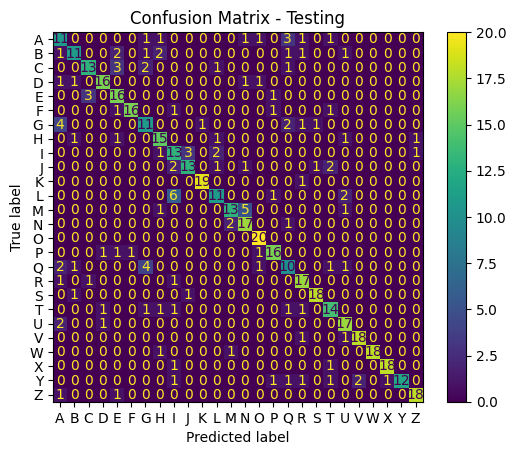

In [16]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    display_labels=[chr(i + 64) for i in range(1, 27)],
    xticks_rotation='vertical'
).plot()
plt.title("Confusion Matrix - Testing")
plt.show()